In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import seaborn as sns


In [7]:
gct_path = 'data/processed/combined_labeled.csv'
df = pd.read_csv(gct_path)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 34470 entries, patient_id to ENSG00000288638.1
dtypes: float64(34468), int64(1), object(1)
memory usage: 131.5+ MB


In [9]:
df.head()

patient_id  healthy  ENSG00000000003.15  ENSG00000000005.6  \
0  GTEX-111FC-3326-SM-5GZYV        1             2.71135           0.000000   
1  GTEX-1128S-2826-SM-5N9DI        1             1.41165           0.000000   
2  GTEX-117XS-3126-SM-5GIDP        1             2.51117           0.000000   
3  GTEX-1192X-3226-SM-5987D        1             2.59852           0.000000   
4  GTEX-11DXW-1026-SM-5H11K        1             2.43769           0.239088   

   ENSG00000000457.14  ENSG00000000460.17  ENSG00000000938.13  \
0             5.58082             5.23988             4.80651   
1             3.57607             4.02521             4.14266   
2             6.39708             3.84968             2.50196   
3             6.75020             7.31770             8.78063   
4             5.64361             4.82642             1.93038   

   ENSG00000000971.16  ENSG00000001036.14  ENSG00000001084.13  ...  \
0             9.21815            12.60680             9.13949  ...   
1             3.80827             7.88997             7.48334  ...   
2             4.25163            12.23500            10.27890  ...   
3             5.44565             7.38296            10.49590  ...   
4             1.90111            12.34400             8.62743  ...   

   ENSG00000288460.1  ENSG00000288547.3  ENSG00000288558.2  ENSG00000288569.1  \
0           0.000000           0.064116            21.8142           0.031800   
1           0.000000           0.000000            23.1318           0.032547   
2           0.064127           0.000000            29.0638           0.019355   
3           0.000000           0.000000            29.0526           0.000000   
4           0.000000           0.000000            23.0118           0.000000   

   ENSG00000288582.2  ENSG00000288596.2  ENSG00000288601.1  ENSG00000288603.1  \
0                0.0            6.06235                0.0            0.00000   
1                0.0            3.95443                0.0            0.00000   
2                0.0            6.41800                0.0            0.00000   
3                0.0            4.38556                0.0            0.00000   
4                0.0            6.36289                0.0            1.17046   

   ENSG00000288611.1  ENSG00000288638.1  
0           0.000000                0.0  
1           0.000000                0.0  
2           0.077322                0.0  
3           0.027188                0.0  
4           0.167685                0.0  

[5 rows x 34470 columns]

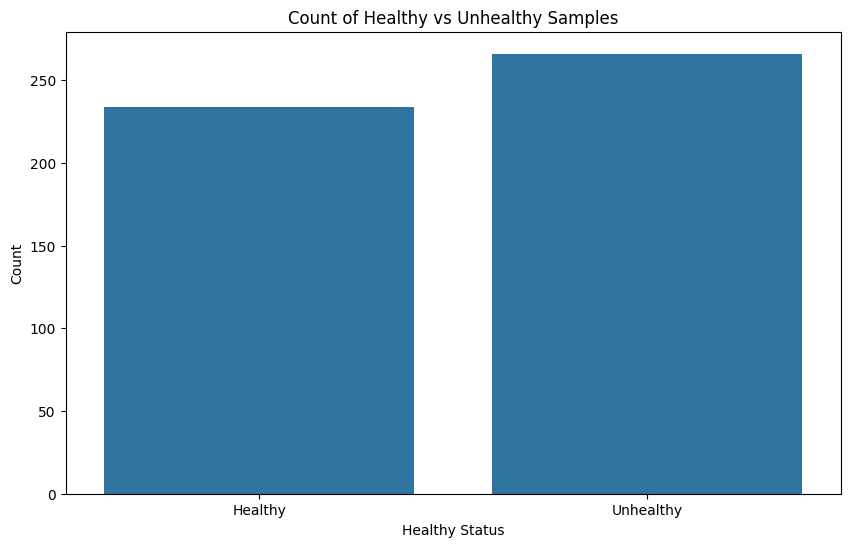

In [8]:
# bar chart to show healthy/unhealthy samples
plt.figure(figsize=(10, 6))
sns.countplot(x='healthy', data=df)
plt.title('Count of Healthy vs Unhealthy Samples')

plt.xlabel('Healthy Status')
plt.ylabel('Count')
plt.xticks([0, 1], ['Healthy', 'Unhealthy'])
plt.show()

In [20]:
df_transposed = df.transpose()
# df_transposed.info()
df_transposed.head()

0                         1    \
patient_id          GTEX-111FC-3326-SM-5GZYV  GTEX-1128S-2826-SM-5N9DI   
healthy                                    1                         1   
ENSG00000000003.15                   2.71135                   1.41165   
ENSG00000000005.6                        0.0                       0.0   
ENSG00000000457.14                   5.58082                   3.57607   

                                         2                         3    \
patient_id          GTEX-117XS-3126-SM-5GIDP  GTEX-1192X-3226-SM-5987D   
healthy                                    1                         1   
ENSG00000000003.15                   2.51117                   2.59852   
ENSG00000000005.6                        0.0                       0.0   
ENSG00000000457.14                   6.39708                    6.7502   

                                         4                         5    \
patient_id          GTEX-11DXW-1026-SM-5H11K  GTEX-11DXY-3126-SM-5N9BT   
healthy                                    1                         1   
ENSG00000000003.15                   2.43769                   2.63006   
ENSG00000000005.6                   0.239088                       0.0   
ENSG00000000457.14                   5.64361                   6.32554   

                                         6                         7    \
patient_id          GTEX-11DYG-2926-SM-5H132  GTEX-11DZ1-2926-SM-5A5KI   
healthy                                    1                         1   
ENSG00000000003.15                   2.36823                   2.71914   
ENSG00000000005.6                        0.0                       0.0   
ENSG00000000457.14                   7.12006                   3.45128   

                                         8                         9    ...  \
patient_id          GTEX-11EI6-2926-SM-5985U  GTEX-11EMC-3326-SM-5P9JH  ...   
healthy                                    1                         1  ...   
ENSG00000000003.15                   1.58033                   2.61647  ...   
ENSG00000000005.6                   0.070047                       0.0  ...   
ENSG00000000457.14                   3.19584                   3.99892  ...   

                                                                  490  \
patient_id          TCGA-GBM.e7dcdd6d-aa28-48e9-949c-af8da8cdf5c0....   
healthy                                                             0   
ENSG00000000003.15                                                1.0   
ENSG00000000005.6                                                 1.0   
ENSG00000000457.14                                                2.0   

                                                                  491  \
patient_id          TCGA-GBM.f26408e6-2880-47d7-9dae-6d2d481c1ea0....   
healthy                                                             0   
ENSG00000000003.15                                                NaN   
ENSG00000000005.6                                                 NaN   
ENSG00000000457.14                                                3.0   

                                                                  492  \
patient_id          TCGA-GBM.f26408e6-2880-47d7-9dae-6d2d481c1ea0....   
healthy                                                             0   
ENSG00000000003.15                                                1.0   
ENSG00000000005.6                                                 1.0   
ENSG00000000457.14                                                3.0   

                                                                  493  \
patient_id          TCGA-GBM.f26408e6-2880-47d7-9dae-6d2d481c1ea0....   
healthy                                                             0   
ENSG00000000003.15                                                1.0   
ENSG00000000005.6                                                 1.0   
ENSG00000000457.14                                                3.0   

                              

In [22]:
# Correlation heatmap
plt.figure(figsize=(20, 18))

# Exclude non-numeric rows and columns
numeric_df = df_transposed.iloc[2:].apply(pd.to_numeric, errors='coerce')

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

correlation_matrix

0         1         2         3         4         5         6    \
0    1.000000  0.965486  0.984647  0.957273  0.980061  0.991539  0.874200   
1    0.965486  1.000000  0.951110  0.940902  0.948628  0.964084  0.901316   
2    0.984647  0.951110  1.000000  0.960690  0.979062  0.979319  0.858678   
3    0.957273  0.940902  0.960690  1.000000  0.957450  0.951377  0.825404   
4    0.980061  0.948628  0.979062  0.957450  1.000000  0.983687  0.850834   
..        ...       ...       ...       ...       ...       ...       ...   
495 -0.007593 -0.008610 -0.008480 -0.009515 -0.010341 -0.010382 -0.005689   
496  0.004334  0.002532  0.003723  0.002383  0.002322  0.002113  0.003615   
497  0.024266  0.023423  0.024008  0.022404  0.024162  0.023562  0.023689   
498  0.018490  0.017074  0.018523  0.018357  0.019594  0.018191  0.013520   
499  0.006363  0.005900  0.006250  0.005727  0.006516  0.006100  0.004415   

          7         8         9    ...       490       491       492  \
0    0.954395  0.877723  0.978476  ...  0.012275  0.026220  0.011363   
1    0.951585  0.950495  0.978192  ...  0.009539  0.024442  0.009523   
2    0.954221  0.851384  0.964796  ...  0.011620  0.024786  0.011039   
3    0.958254  0.827091  0.944179  ...  0.009619  0.022309  0.009954   
4    0.948230  0.841274  0.961461  ...  0.012021  0.026012  0.011161   
..        ...       ...       ...  ...       ...       ...       ...   
495 -0.008300 -0.003367 -0.007189  ...  0.201317  0.560692  0.254277   
496  0.003093  0.004527  0.004286  ...  0.169709  0.521446  0.233791   
497  0.022923  0.024595  0.023846  ...  0.233556  0.702281  0.322588   
498  0.018745  0.013813  0.017384  ...  0.171310  0.375627  0.210293   
499  0.006813  0.005187  0.005850  ...  0.192678  0.383915  0.227793   

          493       494       495       496       497       498       499  
0    0.010561 -0.006219 -0.007593  0.004334  0.024266  0.018490  0.006363  
1    0.008698 -0.008412 -0.008610  0.002532  0.023423  0.017074  0.005900  
2    0.010187 -0.007021 -0.008480  0.003723  0.024008  0.018523  0.006250  
3    0.009211 -0.006178 -0.009515  0.002383  0.022404  0.018357  0.005727  
4    0.010304 -0.009109 -0.010341  0.002322  0.024162  0.019594  0.006516  
..        ...       ...       ...       ...       ...       ...       ...  
495  0.251412  0.868983  1.000000  0.880836  0.641298  0.313217  0.283892  
496  0.210708  0.752182  0.880836  1.000000  0.601377  0.289814  0.193631  
497  0.320288  0.730023  0.641298  0.601377  1.000000  0.511387  0.522847  
498  0.208453  0.385130  0.313217  0.289814  0.511387  1.000000  0.955267  
499  0.225294  0.386734  0.283892  0.193631  0.522847  0.955267  1.000000  

[500 rows x 500 columns]

<Figure size 2000x1800 with 0 Axes>

In [23]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [24]:
X = df.drop('healthy', axis=1)
y = df['healthy']

In [26]:
# Drop non-numeric columns from X
X = X.select_dtypes(include=[np.number])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
from sklearn.impute import SimpleImputer

# Handle missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
X_scaled_imputed = imputer.fit_transform(X_scaled)

# Perform PCA
pca = PCA().fit(X_scaled_imputed)
explained = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained >= 0.95) + 1
print(f"Number of components for >=95% variance: {n_components}")

Number of components for >=95% variance: 53


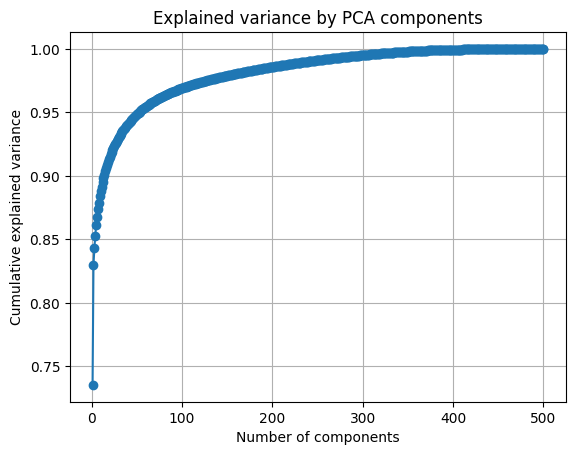

In [29]:
# Visualize explained variance
plt.figure()
plt.plot(np.arange(1, len(explained)+1), explained, marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained variance by PCA components')
plt.grid()
plt.show()

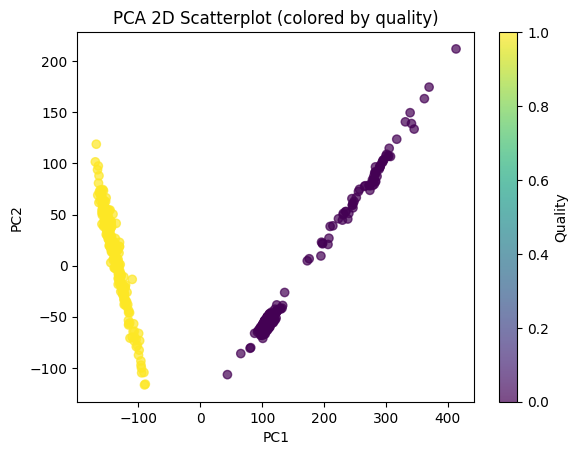

In [31]:
# 2D scatterplot
X_scaled_imputed = imputer.transform(X_scaled)  # Impute missing values
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_scaled_imputed)
plt.figure()
scatter = plt.scatter(X_pca2[:,0], X_pca2[:,1], c=y, cmap='viridis', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA 2D Scatterplot (colored by quality)')
plt.colorbar(scatter, label='Quality')
plt.show()